[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
success
success,迭代次数为
1
次
w=
[6.12626977e+08 1.08802248e+07 4.58878618e+09 6.01315100e+05
 3.77410137e+08 6.43866192e+06 1.79578069e+12 1.02281482e+07
 1.55686212e+09 1.00000000e+00 1.00000000e+00 7.49900000e+03]
sensitivity=
100.0


[Text(0, 0.5, 'sensivity'), Text(0.5, 0, 'number')]

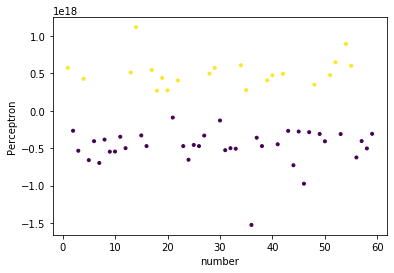

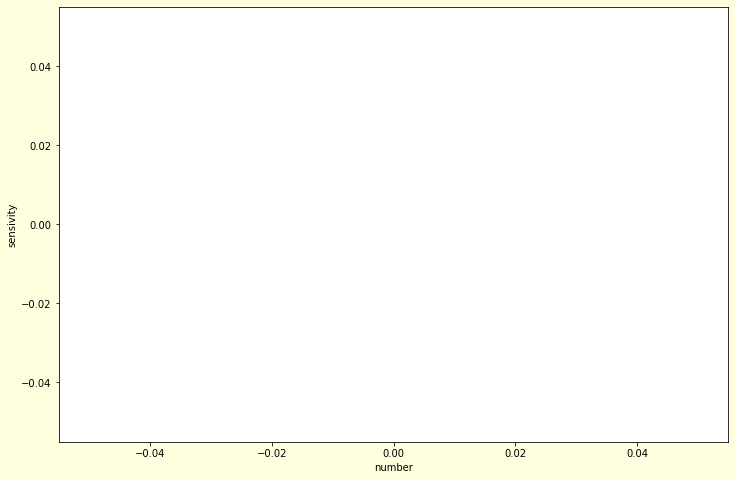

In [68]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import csv
from PIL import Image
from pylab import *

class Model:
    # 类创建对象时自动执行，进行初始化操作
    def __init__(self,X):
        self.w = np.ones(len(X[0]), dtype=np.float32)  # 初始化权重
        print(self.w)
        self.b = 0  # 初始化截距项
        self.l_rate = 0.31  # 学习步长
        self.p=np.zeros(100,dtype=np.float32)
        self.n=0
        self.learn_k=0.8
        # self.data = data
    def __next__(self):
        return self
    def __iter__(self):
        return self
    def judge(self,x,y):
        count=0
        for i in range(len(x)):
            if (y[i]==0 and x[i]>=0) or (y[i]==1 and x[i]>=0):
                count=count+1
        return count
    def Sensitivity(self,x,y):
        count_T=0
        count_TP=0
        for i in range(len(x)):
            if y[i]==0:
                count_T=count_T+1
                if x[i]<=0:
                    count_TP=count_TP+1
        sensitive=count_TP/count_T
        return sensitive
    def mul1(self,x,t):
        sum1=0
        for i in range(len(x)-1):
            sum1=sum1+x[i]*t[i]
        return sum1
    def mul2(self,x,y):
        for i in range(len(x)-1):
            x[i]=x[i]*y
        return x
    # 定义符号函数
    def sign(self,x,xl):
        for i in range(len(x)):
            if xl[i]==0:
                x[i]=self.mul2(x[i],-1)
        return x
    # 随机梯度下降法
    def fix(self,x):
        a=self.mul1(self.w,x)
        b=self.mul1(x,x)
        self.l_rate=self.learn_k*a/b
        #print("self.l_rate=")
        #print(self.l_rate)
        return self.l_rate
    def fit(self, X_train, y_train):
        is_wrong = False
        k=0
        while not(is_wrong):
            wrong_count = 0
            self.n=self.n+1
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if self.mul1(X,self.w) <= 0:
                    self.fix(X)
                    self.w = self.w + self.mul2(X,self.l_rate)# 更新权重
                    wrong_count += 1
            if ((self.judge(np.dot(X_train,self.w),y_train)==(len(y_train))) or (self.n>=100)) == 1:
                is_wrong = True
                print("success") 
                print("success,迭代次数为") 
                print(self.n)
                print("次")
            #print("********************")
            #print(self.Sensitivity(np.dot(X_train,self.w),y_train))
            k=k+1
            self.p[k-1]=self.Sensitivity(np.dot(X_train,self.w),y_train)
            self.p[k-1]=self.p[k-1]*100
            #print(self.p[k])
        return 'Perceptron Model!'
    def test(self,x,y):
        newW = np.dot(x,self.w)
        SEN=self.Sensitivity(newW,y)            
        return SEN
    def score(self):
        pass
###########################处理数据########################
with open("train_hf_data.csv","r", encoding="utf-8") as csvfile0:
    X=csv.reader(csvfile0)
    column = [row[1:] for row in X]
    X=column[1:]
    for t in range(len(X)):
        X[t]=[ float(x) for x in X[t]]
#print("X__:   ")
#print(X)    
    # 1.读取数据集并预处理
#获取excel的工作表Sheet1  
#XLABEL = pd.read_csv("D:/py/data1/train_hf_label.csv")
with open("train_hf_label.csv","r", encoding="utf-8") as csvfile:
    XLABEL=csv.reader(csvfile)
    column = [row[1] for row in XLABEL]
    XLABEL=column[1:]
    XLABEL=[ int(x) for x in XLABEL]
#print("XLABEL:   ")
#print(XLABEL)
with open("train_hf_data_sub.csv","r", encoding="utf-8") as csvfile1:
    Y=csv.reader(csvfile1)
    column = [row[1:] for row in Y]
    Y=column[1:]
    for t in range(len(Y)):
        Y[t]=[ float(x) for x in Y[t]]
#print("Y__:   ")
#print(Y)    
    # 1.读取数据集并预处理
#获取excel的工作表Sheet1  

with open("train_hf_label_sub.csv","r", encoding="utf-8") as csvfile2:
    YLABEL=csv.reader(csvfile2)
    column = [row[1] for row in YLABEL]
    YLABEL=column[1:]
    YLABEL=[ int(x) for x in YLABEL]
#print("YLABEL:   ")
#print(YLABEL)
with open("test_hf_label_add.csv","r", encoding="utf-8") as csvfile3:
    ZLABEL=csv.reader(csvfile3)
    column = [row[1] for row in ZLABEL]
    ZLABEL=column[1:]
    ZLABEL=[ int(x) for x in ZLABEL]
#print("ZLABEL:   ")
with open("test_hf_data_add.csv","r", encoding="utf-8") as csvfile3:
    Z=csv.reader(csvfile3)
    column = [row[1:] for row in Z]
    Z=column[1:]
    for t in range(len(Z)):
        Z[t]=[ float(x) for x in Z[t]]
#print("Z__:   ")
with open("test_hf_data.csv","r", encoding="utf-8") as csvfile4:
    E=csv.reader(csvfile4)
    column = [row[1:] for row in E]
    E=column[1:]
    for t in range(len(E)):
        E[t]=[ float(x) for x in E[t]]
#print("E__:   ")
with open("test_hf_label.csv","r", encoding="utf-8") as csvfile4:
    ELABEL=csv.reader(csvfile4)
    column = [row[1] for row in ELABEL]
    ELABEL=column[1:]
    ELABEL=[ int(x) for x in ELABEL]
#print("ELABEL:   ")
#############################结束预处理###################################
perceptron = Model(X)  # 类的实例化，创建一个对象
perceptron.sign(E,ELABEL)   #########对测试集数据处理
perceptron.sign(Y,YLABEL)
perceptron.fit(Y,YLABEL)  # 调用类的fit方法
x_points = np.linspace(1, 1, 10)  # linspace返回固定间隔的数据
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # 误差分类点到超平面的距离
#plt.plot(x_points, y_)
newX = np.dot(E,perceptron.w)
sensi=perceptron.p
sensi0=perceptron.test(E,ELABEL)
plt.scatter(np.arange(1,1+len(E)),newX,c=ELABEL,marker='.')
#plt.scatter(np.arange(1,101),perceptron.mul2(perceptron.p,100),c=np.arange(1,101),marker='.')
plt.xlabel('number')
plt.ylabel('Perceptron')
print("w=")
print(perceptron.w)
print("sensitivity=")
print(sensi0*100)
#print(sensi)
#plt.plot(np.arange(1,101),(perceptron.p).T)
fig = plt.figure(figsize=(12, 8),facecolor='lightyellow')
ax=fig.gca()
ax.plot(np.arange(0,perceptron.n),perceptron.p[0:perceptron.n])
ax.set(xlabel='number',ylabel='sensivity')
